In [53]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import json
from Levenshtein.StringMatcher import StringMatcher
import numpy as np

works = json.load(open("data/clean/works.json"))
recordings = json.load(open("data/clean/recordings.json"))
artists = json.load(open("data/clean/artists.json"))
form = json.load(open("data/output/lyrics_form.json"))
vocab = json.load(open("data/vocab.json"))

In [66]:
id = 5835
w = works[id]

if len(w['lyric']):
    texto = ''
    for verso in w['lyric']:
        for linea in verso:
            texto += linea + '\n'
        texto += '\n'
            
print u"Título(es): %s" % (w['title'])
print "Compositor(es): %s" % ''.join([artists[c]['name'] for c in w['composers']])
print "Liricista(s): %s" % ''.join([artists[l]['name'] for l in w['lyricists']])
print "Forma: %s" % (''.join([i['section']['section.label'] for i in form[str(id)]]))
print ""
print "Letra: "
print texto

Título(es): La canción inolvidable
Compositor(es): Enrique Francini
Liricista(s): Carlos Bahr
Forma: ABAC

Letra: 
Violín sentimental,
vuelve a tocar esa canción inolvidable.
Violín, ¿por qué no estás?,
quiero creer que estamos juntos como aquella vez.
Violín vuelve a tocar
como en el dulce tiempo que pasó.
Violín, en tu canción
vuelve el ayer con su milagro de ilusión.

Mi corazón, lo mismo que otros días,
vuelve a sentir la magia del amor
y a revivir pasadas alegrías
por el embrujo emocional de tu canción sentimental.

Violín sentimental,
vuelve a tocar esa canción inolvidable.
Violín, ¿por qué no estás?,
quiero creer que estamos juntos como aquella vez.
Violín vuelve a tocar
como en el dulce tiempo que pasó.
Violín, en tu canción
vuelve el ayer con su milagro de ilusión.




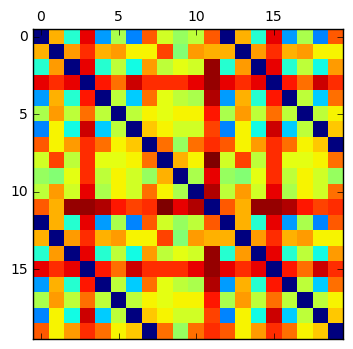

In [42]:
lyric = [item for sublist in w['lyric'] for item in sublist]
ssm = np.zeros((len(lyric), len(lyric)), dtype=float)
for i in range(len(lyric)):
    for j in range(len(lyric)):
        lev = StringMatcher(seq1=lyric[i], seq2=lyric[j]).distance()
        ssm[i][j] = lev

plt.matshow(ssm)

In [4]:
import json
works = json.load(open('./data/clean/works.json'))
w = works[20]
artists = json.load(open("data/clean/artists.json"))

In [67]:
counts = {'lyricsmania': 0, 'lyricswikia': 0, 'minilyrics': 0, 'musixmatch': 0, 'songlyrics': 0, 'todotango': 0, 'letras.com': 0}
for w in works:
    
    lyricsmania = json.load(open("./data/lyrics/%d/%s.json" % (w['id'], "lyricsmania")))
    lyricswikia = json.load(open("./data/lyrics/%d/%s.json" % (w['id'], "lyricswikia")))
    minilyrics = json.load(open("./data/lyrics/%d/%s.json" % (w['id'], "minilyrics")))
    musixmatch = json.load(open("./data/lyrics/%d/%s.json" % (w['id'], "musixmatch")))
    songlyrics = json.load(open("./data/lyrics/%d/%s.json" % (w['id'], "songlyrics")))
    
    if len(w['lyric']):
        counts['todotango']+=1
    
        if len(lyricsmania):
            counts['lyricsmania']+=1
        elif len(lyricswikia):
            counts['lyricswikia']+=1
        elif len(minilyrics):
            counts['minilyrics']+=1
        elif len(musixmatch):
            counts['musixmatch']+=1
        elif len(songlyrics):
            counts['songlyrics']+=1
print counts

{'songlyrics': 0, 'lyricswikia': 562, 'musixmatch': 13, 'minilyrics': 1594, 'todotango': 5647, 'lyricsmania': 0}


In [73]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
transf = CountVectorizer(encoding=u'unicode', strip_accents=u'unicode')


oraciones = []
for i in minilyrics:
    for j in i:
        #print w['external_id']
        #print j['lyric']
        oraciones.append(j['lyric'])

vectores = transf.fit_transform(oraciones)

v = (vectores * vectores.T).A
v[np.diag_indices_from(v)] -= 1

#plt.matshow(v)

In [74]:
np.argmax(v, axis=0)

array([0])

In [108]:

one_doc = texto
one_doc_code = transf.transform([one_doc])
v = (vectores * one_doc_code.T).A

In [109]:
v
8,12,17,21,23

array([[ 99],
       [500],
       [ 99],
       [503],
       [593],
       [ 96],
       [399],
       [303],
       [840],
       [ 99],
       [ 80],
       [  4],
       [840],
       [ 87],
       [535],
       [  1],
       [399],
       [840],
       [537],
       [273],
       [ 41],
       [817],
       [320],
       [842],
       [251],
       [ 95]])

In [110]:
print oraciones[23]
print texto

Rechiflado en mi tristeza,
hoy te evoco y veo que has sido
en mi pobre vida paria sólo una buena mujer.
Tu presencia de bacana puso calor en mi nido,
fuiste buena, consecuente, y yo sé que me has querido
como no quisiste a nadie, como no podrás querer.

Se dio el juego de remanye cuando vos, pobre percanta,
gambeteabas la pobreza en la casa de pensión.
Hoy sos toda una bacana, la vida te ríe y canta,
Ios morlacos del otario los jugás a la marchanta
como juega el gato maula con el mísero ratón.

Hoy tenés el mate lleno de infelices ilusiones,
te engrupieron los otarios, las amigas y el gavión;
la milonga, entre magnates, con sus locas tentaciones,
donde triunfan y claudican milongueras pretensiones,
se te ha entrado muy adentro en tu pobre corazón.

Nada debo agradecerte, mano a mano hemos quedado;
no me importa lo que has hecho, lo que hacés ni lo que harás...
Los favores recibidos creo habértelos pagado
y, si alguna deuda chica sin querer se me ha olvidado,
en la cuenta del otario que

In [32]:
artists[3581]

{u'alias': [u'Romanelli, Orlando'],
 u'begin_date': [u'22', 6, u'1903'],
 u'begin_place': u'Montevideo Uruguay',
 u'end_date': [u'28', 7, u'1989'],
 u'external_id': {u'todotango': u'http://www.todotango.com/creadores/ficha/347/Orlando-Romanelli'},
 u'gender': u'',
 u'id': 3581,
 u'name': u'Orlando Romanelli',
 u'short_description': u'Pianista, director y compositor',
 u'type': u'Person'}